# Linear regression

X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

crime_df = pd.read_csv('crime_data.csv')
crime_df.head

C:\Users\toriw\AppData\Local\Temp\ipykernel_38904\3713719017.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<bound method NDFrame.head of       X1    X2  X3  X4  X5  X6  X7
0    478   184  40  74  11  31  20
1    494   213  32  72  11  43  18
2    643   347  57  70  18  16  16
3    341   565  31  71  11  25  19
4    773   327  67  72   9  29  24
5    603   260  25  68   8  32  15
6    484   325  34  68  12  24  14
7    546   102  33  62  13  28  11
8    424    38  36  69   7  25  12
9    548   226  31  66   9  58  15
10   506   137  35  60  13  21   9
11   819   369  30  81   4  77  36
12   541   109  44  66   9  37  12
13   491   809  32  67  11  37  16
14   514    29  30  65  12  35  11
15   371   245  16  64  10  42  14
16   457   118  29  64  12  21  10
17   437   148  36  62   7  81  27
18   570   387  30  59  15  31  16
19   432    98  23  56  15  50  15
20   619   608  33  46  22  24   8
21   357   218  35  54  14  27  13
22   623   254  38  54  20  22  11
23   547   697  44  45  26  18   8
24   792   827  28  57  12  23  11
25   799   693  35  57   9  60  18
26   439   448  31  61  1

In [2]:
crime_df.corr()

X1        X2        X3        X4        X5        X6        X7
X1  1.000000  0.756505  0.533198 -0.135459  0.322519 -0.175224 -0.026283
X2  0.756505  1.000000  0.509339 -0.184445  0.291031 -0.199070 -0.045570
X3  0.533198  0.509339  1.000000  0.120265  0.311526 -0.277475  0.124502
X4 -0.135459 -0.184445  0.120265  1.000000 -0.537162  0.182364  0.681072
X5  0.322519  0.291031  0.311526 -0.537162  1.000000 -0.626953 -0.513958
X6 -0.175224 -0.199070 -0.277475  0.182364 -0.626953  1.000000  0.591663
X7 -0.026283 -0.045570  0.124502  0.681072 -0.513958  0.591663  1.000000

<Axes: >

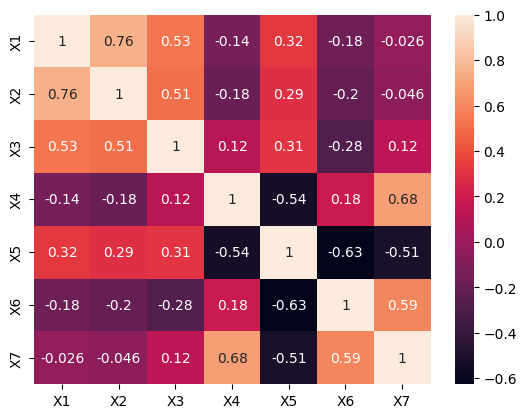

In [3]:
sns.heatmap(crime_df.corr(),annot=True)

In [5]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5','X1']]
# x is what we are using to predict
X = np.array(crime_df['X5']).reshape(-1,1)
# y is what we are predicting
y = np.array(crime_df['X1']).reshape(-1,1)

#1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=32)

In [6]:
#2. Create the model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [7]:
#3. predict new values
y_pred = regression_model.predict(X_test)
y_pred

array([[824.84992679],
       [676.62367582],
       [729.5616226 ],
       [687.21126518],
       [793.08715873],
       [623.68572905],
       [697.79885453],
       [644.86090776],
       [750.73680131],
       [740.14921195],
       [687.21126518],
       [740.14921195],
       [782.49956937],
       [729.5616226 ],
       [793.08715873]])

In [8]:
# r squared
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.1533224430792084


In [9]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1533224430792084

In [ ]:
plt.scatter(X_test, y_test, color ='m')
plt.plot(X_test,y_pred,color='m')